In [2]:
import numpy as np
import pandas as pd
import sklearn 

In [6]:
from sklearn.datasets import load_boston
df = load_boston()

In [14]:
 df.keys() #Return all the keys of the dataset dictionary

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [20]:
print(df.data) 

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [29]:
boston = pd.DataFrame(df.data, columns=df.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [30]:
boston['MEDV'] = df.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [31]:
boston.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [32]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X = boston.drop('MEDV', axis=1)
Y = boston['MEDV'] 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.15, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(430, 13)
(76, 13)
(430,)
(76,)


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [52]:
## FITTING MODEL ON THE  TRAINING DATASET

lin_model = LinearRegression()

lin_model.fit(X_train, Y_train)

LinearRegression()

In [45]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print("\n")
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
print("The model performance for testing set")
print('RMSE is {}'.format(rmse))

The model performance for training set
RMSE is 4.710901797319796


The model performance for testing set
RMSE is 4.687543527902972


TypeError: ignored

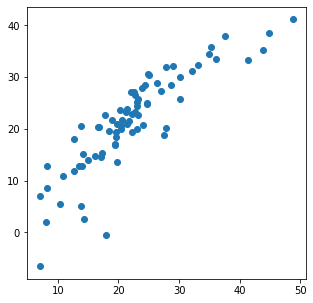

In [51]:
#MATPLOTLIB IS A LIBRARY TO PLOT THE CURVES 
#PART OF DATA VISUALIZATION
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(Y_test, y_test_predict)
plt.plot([min(y_test_predict),max(y_test_predict)], [min(y_test_predict)],max[y_test_predict][min(x_test_predict),max(x_test_predict)], [min(x_test_predict)],max[x_test_predict])
plt.xlabel('Actual')
plt.ylabel('Predicted')